![Credit card being held in hand](credit_card.jpg)

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None) 
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


In [48]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


In [49]:
cc_apps.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [50]:
cc_apps.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

# Data Cleaning
- Since we are given a data set with no headers and no description for each column (except the last one, which is the target variable), we will make it as is.
- Replace missing values depending on the distribution of each column.
## Col 0
- The first column is a categorical variable with values a and b, with missing value of '?'. Replace '?' with the mode of the column.
- Converted to category type
## 
## Target Variable
- The last column is the target variable, which is a binary variable. We can assume that + indicates approval and - indicates rejection.

array([[<Axes: title={'center': '2'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '12'}>]],
      dtype=object)

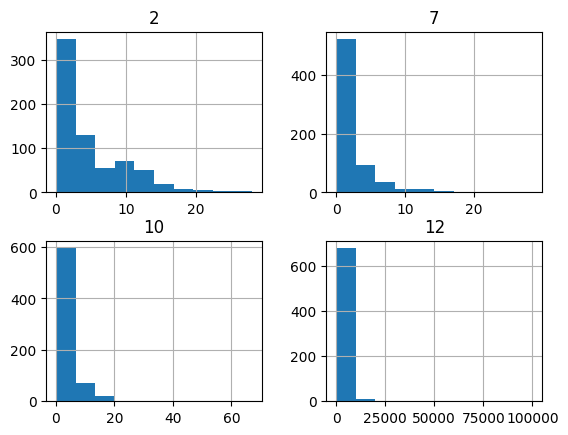

In [51]:
cc_apps.hist()

In [52]:
# column 0
print("Before replacing missing values")
print(cc_apps[0].value_counts())
cc_apps[0] = cc_apps[0].replace('?', cc_apps[0].mode()[0]).astype('category')
print("After replacing missing values")
print(cc_apps[0].value_counts())

Before replacing missing values
0
b    468
a    210
?     12
Name: count, dtype: int64
After replacing missing values
0
b    480
a    210
Name: count, dtype: int64


Null values in column 1: 12
Replacing missing values with the median of the column because of its distribution:  28.46
After cleaning 0


<Axes: >

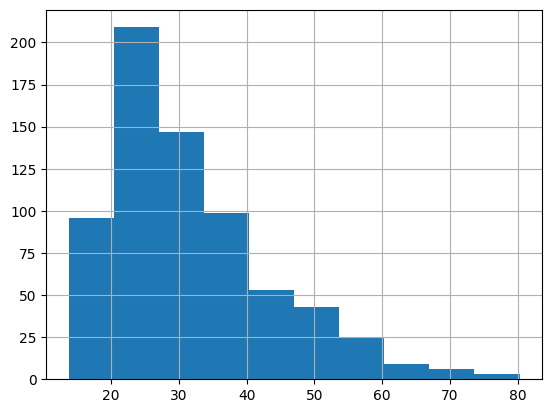

In [53]:
# column 1
cc_apps[1] = cc_apps[1].replace('?', np.nan)
cc_apps[1] = cc_apps[1].astype('float')
print("Null values in column 1:", cc_apps[1].isnull().sum())
print("Replacing missing values with the median of the column because of its distribution: ", float(cc_apps[1].median()))
cc_apps[1] = cc_apps[1].fillna(cc_apps[1].median())
print("After cleaning", cc_apps[1].isnull().sum())
cc_apps[1].hist()

float64
Null values in column 2: 0


<Axes: >

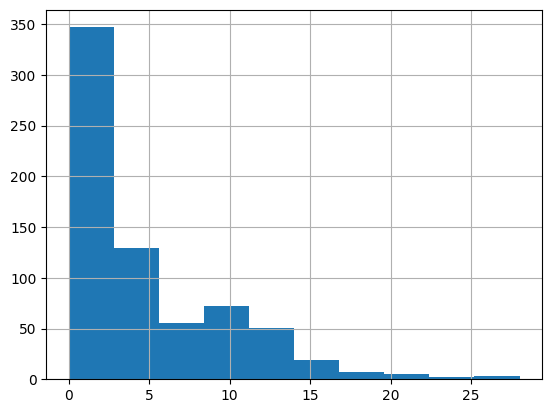

In [54]:
# column 2
# check data dtype
print(cc_apps[2].dtype)
print("Null values in column 2:", cc_apps[2].isnull().sum())
# Nothing to do for column 2 as it is already numeric
cc_apps[2].hist()

In [55]:
# column 3
print("Null values in column 3:", cc_apps[3].isnull().sum())
print(cc_apps[3].value_counts())
cc_apps[3] = cc_apps[3].replace(['?', 'l'], cc_apps[3].mode()[0]).astype('category')
print("After replacing missing values")
print(cc_apps[3].value_counts())

Null values in column 3: 0
3
u    519
y    163
?      6
l      2
Name: count, dtype: int64
After replacing missing values
3
u    527
y    163
Name: count, dtype: int64


Null values in column 4: 0
4
g     519
p     163
?       6
gg      2
Name: count, dtype: int64
Replacing missing values with the mode of the column because of its distribution:  g


<Axes: xlabel='4'>

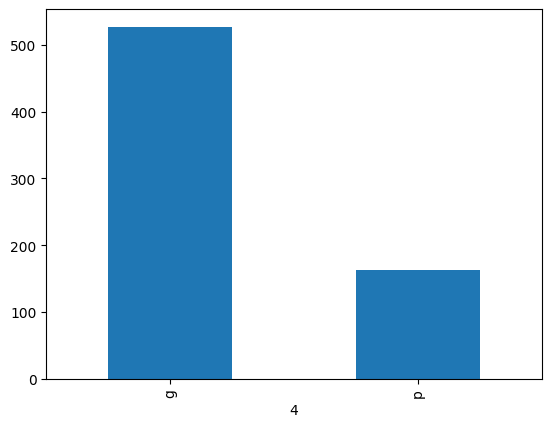

In [56]:
# column 4
print("Null values in column 4:", cc_apps[4].isnull().sum())
print(cc_apps[4].value_counts())
print("Replacing missing values with the mode of the column because of its distribution: ", cc_apps[4].mode()[0])
cc_apps[4] = cc_apps[4].replace(['?', 'gg'], cc_apps[4].mode()[0]).astype('category') # ? and gg are converted to g
cc_apps[4].value_counts().plot.bar()

In [57]:
#column 5, 6, 8, 9 and 11 are of categorical variables
cat_col = [5, 6, 8, 9,11]
for col in cat_col:
    print("Before replacing missing values in column", col)
    print(cc_apps[col].value_counts())
    cc_apps[col] = cc_apps[col].replace('?', cc_apps[col].mode()[0]).astype('category')
    print("After replacing missing values")
    print(cc_apps[col].value_counts())
cc_apps

Before replacing missing values in column 5
5
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: count, dtype: int64
After replacing missing values
5
c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: count, dtype: int64
Before replacing missing values in column 6
6
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64
After replacing missing values
6
v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64
Before replacing missing values in column 8
8
t    361
f    329
Name: count, dtype: int64
After replacing missing values
8
t    361
f    329
Name: count, dtype: int64
Before replacing missing values in column 9
9
f    395
t    295
Name: count, dtype: int64
A

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [58]:
# For 7 and 10
print(cc_apps.dtypes)

0     category
1      float64
2      float64
3     category
4     category
5     category
6     category
7      float64
8     category
9     category
10       int64
11    category
12       int64
13      object
dtype: object


In [59]:

# target variable
pd.set_option('future.no_silent_downcasting', True)
cc_apps[13] = cc_apps[13].replace(['+', '-'], [1, 0]).astype('int')
print(cc_apps[13].value_counts())

13
0    383
1    307
Name: count, dtype: int64


In [60]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       690 non-null    category
 1   1       690 non-null    float64 
 2   2       690 non-null    float64 
 3   3       690 non-null    category
 4   4       690 non-null    category
 5   5       690 non-null    category
 6   6       690 non-null    category
 7   7       690 non-null    float64 
 8   8       690 non-null    category
 9   9       690 non-null    category
 10  10      690 non-null    int64   
 11  11      690 non-null    category
 12  12      690 non-null    int64   
 13  13      690 non-null    int32   
dtypes: category(8), float64(3), int32(1), int64(2)
memory usage: 36.9 KB


In [61]:
cc_apps_encoded = pd.get_dummies(cc_apps, drop_first=True)
cc_apps_encoded.head()

,1,2,7,10,12,13,0_b,3_y,4_p,5_c,...,6_h,6_j,6_n,6_o,6_v,6_z,8_t,9_t,11_p,11_s
0,30.83,0.000,1.25,1,0,1,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
1,58.67,4.460,3.04,6,560,1,False,False,False,False,...,True,False,False,False,False,False,True,True,False,False
2,24.50,0.500,1.50,0,824,1,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,27.83,1.540,3.75,5,3,1,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
4,20.17,5.625,1.71,0,0,1,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [62]:
cc_apps_encoded.isnull().sum()

1       0
2       0
7       0
10      0
12      0
13      0
0_b     0
3_y     0
4_p     0
5_c     0
5_cc    0
5_d     0
5_e     0
5_ff    0
5_i     0
5_j     0
5_k     0
5_m     0
5_q     0
5_r     0
5_w     0
5_x     0
6_dd    0
6_ff    0
6_h     0
6_j     0
6_n     0
6_o     0
6_v     0
6_z     0
8_t     0
9_t     0
11_p    0
11_s    0
dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
cc_apps_encoded.columns = cc_apps_encoded.columns.astype('str')
X_train, X_test, y_train, y_test = train_test_split(cc_apps_encoded.drop('13', axis=1), cc_apps_encoded['13'], test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=5000)
parameters = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg','sag','saga']}
grid_search = GridSearchCV(logreg, parameters, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:349: Conve

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [68]:
y_pred = grid_search.predict(X_test)


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        68
           1       0.81      0.81      0.81        70

    accuracy                           0.81       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.81      0.81      0.81       138

Accuracy: 0.8115942028985508


In [70]:
# using standared scaler to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression(max_iter=5000)
parameters_scaled = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['liblinear', 'newton-cg','sag','saga']}
grid_scaled_search = GridSearchCV(logreg_scaled, parameters_scaled, cv=5, verbose=1)
grid_scaled_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'saga']},
             verbose=1)

In [71]:
y_pred_scaled = grid_scaled_search.predict(X_test_scaled)
confusion_matrix(y_test, y_pred_scaled)
print(classification_report(y_test, y_pred_scaled))
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82        68
           1       0.84      0.80      0.82        70

    accuracy                           0.82       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.82      0.82      0.82       138

Accuracy: 0.8188405797101449


In [73]:
best_model = grid_scaled_search.best_estimator_
best_score = best_model.score(X_test_scaled, y_test)
best_score

0.8188405797101449